In [1]:
import pandas as pd
import numpy as np
import math

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 100)

raw_df = (pd.read_csv("data.csv"))
#display(raw_df.columns)
display(raw_df)

,id,listing_url,scrape_id,last_scraped,name,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201009050447,2020-10-11,Quiet Garden View Room & Super Fast WiFi,https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",NaN,NaN,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36575,4.94142,Private room in apartment,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Laptop-friendly workspace"", ""Coffee maker"", ...",$59.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,0,0,0,0,2020-10-11,278,6,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,1,0,1,0,1.98
1,20168,https://www.airbnb.com/rooms/20168,20201009050447,2020-10-11,Studio with private bathroom in the centre 1,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36424,4.89396,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Laptop-friendly workspace"", ""TV"", ""Carbon mo...",$236.00,1,365,4,4,60,365,4.0,250.7,NaN,t,0,0,0,0,2020-10-11,340,48,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,t,2,0,2,0,2.63
2,25428,https://www.airbnb.com/rooms/25428,20201009050447,2020-10-11,Lovely apt in City Centre (w.lift) near Jordaan,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,Joan,2009-11-20,"New York, New York, United States",within a few hours,100%,39%,t,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews']",t,f,NaN,Centrum-West,NaN,52.37297,4.88339,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$125.00,14,180,14,14,180,180,14.0,180.0,NaN,t,0,0,4,58,2020-10-11,5,2,0,2018-01-21,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.15
3,27886,https://www.airbnb.com/rooms/27886,20201009050447,2020-10-10,"Romantic, stylish B&B houseboat in canal district",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",NaN,NaN,100%,t,https://a0.muscache.com/im/users/97647/p

In [2]:
# Определяем стратегии трансформации данных
# Сама трансформация определена в mappers.py
# TODO: Разобраться с категориальными переменными

col_strategies = {
#     'id': 'Ignore',
#     'listing_url': 'Ignore',
#     'scrape_id': 'Ignore',
#     'last_scraped': 'Ignore',
#     'name': 'Ignore',
#     'picture_url': 'Ignore',
#     'host_id': 'Ignore',
#     'host_url': 'Ignore',
#     'host_name': 'Ignore',
#     'host_since': 'Ignore',
#     'host_location': 'Ignore',
#     'host_response_time': 'Ignore',
#     'host_response_rate': 'Percentage', #Очень много пропущенных! 67%
#     'host_acceptance_rate': 'Percentage', #Очень много пропущенных! 44%
    'host_is_superhost': 'Boolean',
#     'host_thumbnail_url': 'Ignore',
#     'host_picture_url': 'Ignore',
#     'host_neighbourhood': 'Ignore',
    'host_listings_count': 'Float',
#     'host_total_listings_count': 'Ignore',
#     'host_verifications': 'Ignore',
#    'host_has_profile_pic': 'Boolean',
    'host_identity_verified': 'Boolean',
#     'neighbourhood': 'Ignore',
    'neighbourhood_cleansed': 'Id',
#     'neighbourhood_group_cleansed': 'Id',
#     'latitude': 'Ignore',
#     'longitude': 'Ignore',
    'property_type': 'Id',
#    'room_type': 'Id',
    'accommodates': 'Float',
#     'bathrooms': 'Float', #Очень много пропущенных! 100%!!!
#     'bathrooms_text': 'Ignore',
    'bedrooms': 'Float',
    'beds': 'Float',
    'amenities': 'Id',
    'price': 'Price',
    'minimum_nights': 'Float',
    'maximum_nights': 'Float',
#     'minimum_minimum_nights': 'Ignore',
#     'maximum_minimum_nights': 'Ignore',
#     'minimum_maximum_nights': 'Ignore',
#     'maximum_maximum_nights': 'Ignore',
#     'minimum_nights_avg_ntm': 'Ignore',
#     'maximum_nights_avg_ntm': 'Ignore',
#     'calendar_updated': 'Ignore',
#    'has_availability': 'Boolean',
#     'availability_30': 'Ignore',
#     'availability_60': 'Ignore',
    'availability_90': 'Float',
#     'availability_365': 'Ignore',
#     'calendar_last_scraped': 'Ignore',
    'number_of_reviews': 'Float',
#     'number_of_reviews_ltm': 'Ignore',
#     'number_of_reviews_l30d': 'Ignore',
#     'first_review': 'Ignore',
#     'last_review': 'Ignore',
    'review_scores_rating': 'Float',
    'review_scores_accuracy': 'Float',
    'review_scores_cleanliness': 'Float',
    'review_scores_checkin': 'Float',
    'review_scores_communication': 'Float',
    'review_scores_location': 'Float',
    'review_scores_value': 'Float',
#     'license': 'Id',  #Очень много пропущенных! 100%!!!
#     'instant_bookable': 'Boolean',
#     'calculated_host_listings_count': 'Ignore',
#     'calculated_host_listings_count_entire_homes': 'Ignore',
#     'calculated_host_listings_count_private_rooms': 'Ignore',
#     'calculated_host_listings_count_shared_rooms': 'Ignore',
    'reviews_per_month': 'Float',
}

import mappers
import importlib
importlib.reload(mappers)
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')

index = range(0, len(raw_df));
df = pd.DataFrame([], index=index)

for col_name in raw_df.columns:
    col_strategy = col_strategies.get(col_name, None)
    if (col_strategy is not None):
        mapped_column = mappers.map_column(raw_df[col_name], col_strategy)
#         display(mapped_column)
        if (mapped_column is not None):
            df = df.join(mapped_column.reindex(index))
            

df.property_type.replace({
    'Entire apartment': 'Apartment',
    'Private room in apartment': 'Room',
    'Entire loft': 'Apartment',
    'Entire condominium': 'Apartment',
    'Entire serviced apartment':'Apartment',
    'Entire townhouse': 'House',
    'Entire house': 'House',
    'Private room in house': 'Room',
    'Private room in bed and breakfast': 'Room',
    'Private room in townhouse':'Room'
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'
            
#df = df[df['room_type'].isin(['Entire home/apt','Private room'])]   
    
    
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_list_string = amenities_list_string.replace('] [', ',')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

cols_to_replace_nulls = df.iloc[:,df.columns.get_loc("check_in_24h"):].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

infrequent_amenities = []
for col in df.iloc[:,df.columns.get_loc("check_in_24h"):].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

df.drop(infrequent_amenities, axis=1, inplace=True)

df.drop('amenities', axis=1, inplace=True)
    
# Что-то делаем с данными
df['review_scores_rating'] = df['review_scores_rating'].fillna(0)
#df['price'] = np.log(df['price'])
    
#display(df)

['check_in_24h', 'air_conditioning', 'high_end_electronics', 'bbq', 'nature_and_views', 'breakfast', 'elevator', 'gym', 'child_friendly', 'hot_tub_sauna_or_pool', 'pets_allowed', 'secure', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable']


In [3]:
# Смотрим процент пропущенных значений
df.isna().mean().round(4).multiply(100)

host_is_superhost               0.30
host_listings_count             0.30
host_identity_verified          0.30
neighbourhood_cleansed          0.00
property_type                   0.00
accommodates                    0.00
bedrooms                        5.26
beds                            0.50
price                           0.00
minimum_nights                  0.00
maximum_nights                  0.00
availability_90                 0.00
number_of_reviews               0.00
review_scores_rating            0.00
review_scores_accuracy         13.59
review_scores_cleanliness      13.59
review_scores_checkin          13.64
review_scores_communication    13.59
review_scores_location         13.62
review_scores_value            13.62
reviews_per_month              12.19
balcony                         0.00
bed_linen                       0.00
tv                              0.00
coffee_machine                  0.00
cooking_basics                  0.00
white_goods                     0.00
p

In [4]:
# Убираем пропущенные
no_na_df = df.dropna()
print('Percentage left: ' + str(100 * (len(no_na_df)/len(df))))
df = no_na_df

no_null_df = df.loc[(df['price'] < 1000)]
print('Percentage left: ' + str(100 * (len(no_null_df)/len(df))))
df = no_null_df

# Дропаем листинги дороже 1000 долларов за ночь - их мало
#under_1k = df.where(df['price'].le(1000))
#df=under_1k
#df.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear')

Percentage left: 81.38643381961452
Percentage left: 99.87570325788303


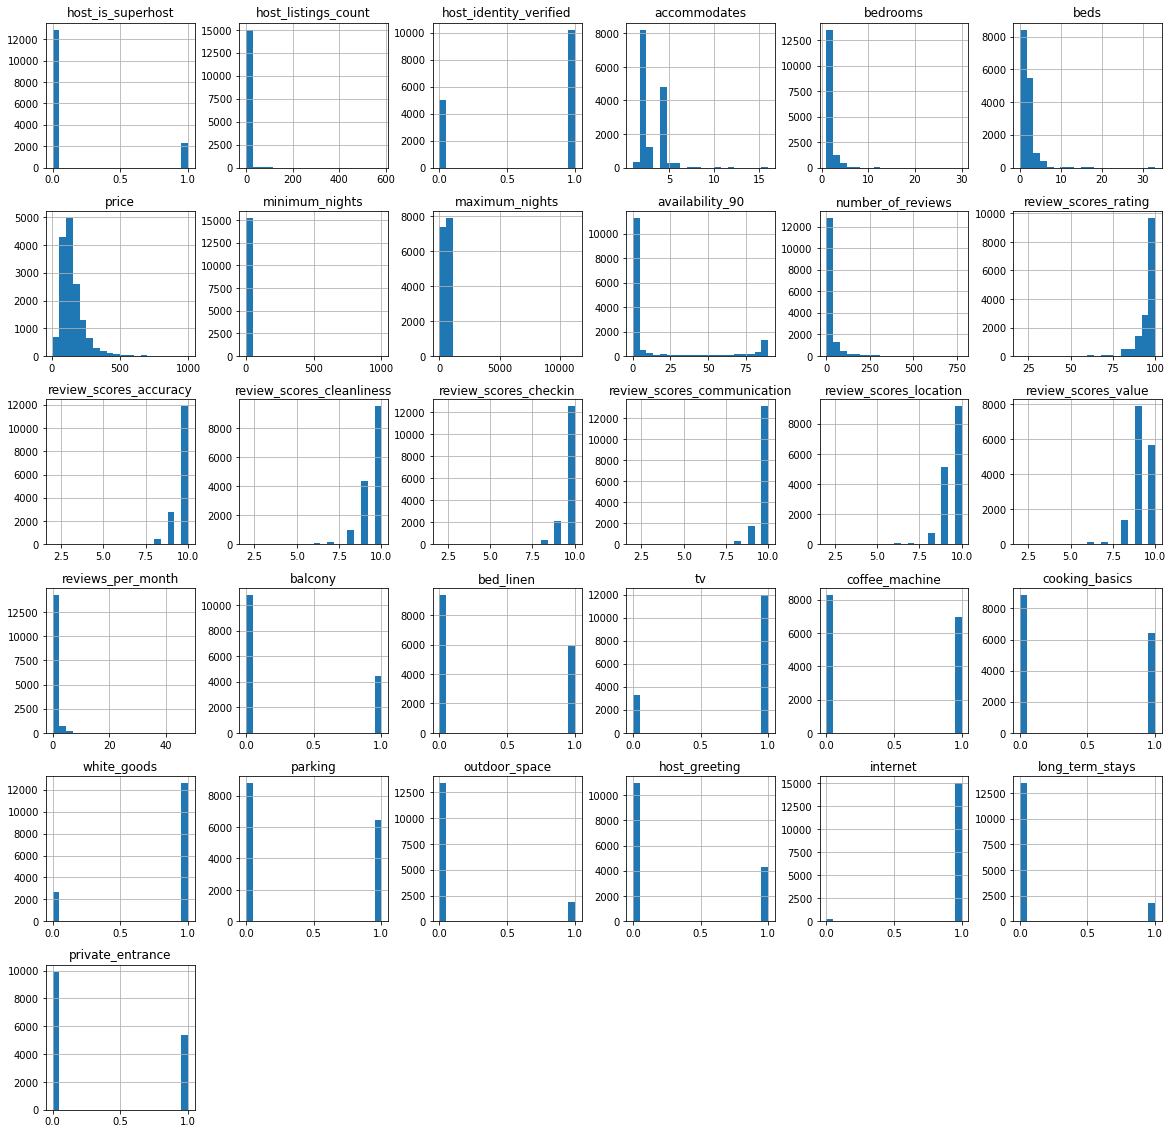

In [5]:
# Посмотрим на распределение цен на апартаменты:

import matplotlib.pyplot as plt

# for column in df.columns:
#     series = df[column]
#     print(column)
#     plt.hist(series,100)
#     plt.show()

#     plt.boxplot(series)
#     plt.show()

# names = list(data.keys())
# values = list(data.values())

# fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
# axs[0].bar(df['neighbourhood_cleansed'], df['neighbourhood_cleansed'])
# axs[1].bar(df['property_type'], values)
# axs[2].bar(names, values)

# display(df[['neighbourhood_cleansed', 'price']].groupby(['neighbourhood_cleansed']).mean().plot.bar())
# display(df[['neighbourhood_cleansed', 'price']].groupby(['neighbourhood_cleansed']).mean().sort_values(by='price', ascending=False))
# display(df[['neighbourhood_cleansed', 'price']].groupby(['neighbourhood_cleansed']).count().sort_values(by='price', ascending=False))
# display(df[['property_type', 'price']].groupby(['property_type']).mean().sort_values(by='price', ascending=False))
# display(df[['property_type', 'price']].groupby(['property_type']).count().sort_values(by='price', ascending=False))
# display(df[['room_type', 'price']].groupby(['room_type']).mean().sort_values(by='price', ascending=False))
# display(df[['room_type', 'price']].groupby(['room_type']).count().sort_values(by='price', ascending=False))

df.hist(figsize=(20,20), bins=20);

In [6]:
TARGET_COLUMN = 'price'
ALL_BUT_TARGET_COLUMN = df.columns[df.columns != TARGET_COLUMN]


In [7]:
# import matplotlib.pyplot as plt
# from sklearn import linear_model
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split

# TARGET_COLUMN = 'price'

# ALL_BUT_TARGET_COLUMN = df.columns[df.columns != TARGET_COLUMN]

# train, test = train_test_split(df, test_size=0.2)

# # Тренировочная выборка
# predictors = train[ALL_BUT_TARGET_COLUMN]
# target = train[[TARGET_COLUMN]]

# # Контрольная выборка
# test_predictors = test[ALL_BUT_TARGET_COLUMN]
# test_target = test[[TARGET_COLUMN]]

# regr = linear_model.LinearRegression()
# est = regr.fit(predictors, target)

# # Предсказываем на контрольной выборке
# prediction = regr.predict(test_predictors)


# mse = mean_squared_error(test_target, prediction)
# mse_root = math.sqrt(mean_squared_error(test_target, prediction))
# r2 = r2_score(test_target, prediction)

# print('MSE: %.2f' % mse)
# print('Mean Error: %.2f' % mse_root)
# print('R^2: %.2f' % r2)

# print('Коэфициенты: \n', pd.DataFrame(regr.coef_[0].round(3), index=ALL_BUT_TARGET_COLUMN))
# print(len(regr.coef_[0]))
# print(len(ALL_BUT_TARGET_COLUMN))

# Пробуем кросс-валидацию???

In [8]:
from patsy import dmatrices
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np

# Уравнение регрессии
equation = TARGET_COLUMN + ' ~ ' + (' + '.join(ALL_BUT_TARGET_COLUMN))

y, X = dmatrices(equation, data=df, return_type='dataframe')

renamer = lambda x: x.replace('[', '_').replace(']', '')

y = y.rename(columns = renamer)
X = X.rename(columns = renamer)

display(df.corr())

# Разбиваем выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 1000)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print('MSE: %.2f' % mse)
print('Mean Error: %.2f$' % rmse)
print('R^2: %.2f' % r2)

# print('Коэфициенты: \n', pd.DataFrame(xg_reg.coef_[0].round(3), index=ALL_BUT_TARGET_COLUMN))
# print(len(xg_reg.coef_))
# print(len(ALL_BUT_TARGET_COLUMN))



# Пробуем кросс-валидацию
# data_dmatrix = xgb.DMatrix(data=X,label=y)

# params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
#                 'max_depth': 5, 'alpha': 10}

# cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
#                     num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

# xgb.plot_tree(xg_reg,num_trees=0)
# plt.rcParams['figure.figsize'] = [50, 10]
# plt.show()

,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,balcony,bed_linen,tv,coffee_machine,cooking_basics,white_goods,parking,outdoor_space,host_greeting,internet,long_term_stays,private_entrance
host_is_superhost,1.000000,-0.028827,0.100460,-0.018269,-0.061060,-0.006778,-0.038411,-0.010640,-0.028918,0.198912,0.348413,0.138081,0.126645,0.150607,0.127609,0.110420,0.119082,0.103158,0.320679,0.114253,0.182365,-0.071875,0.233855,0.135244,-0.109678,0.148116,0.051859,0.112884,0.031714,0.136196,0.071324
host_listings_count,-0.028827,1.000000,0.080679,0.019924,0.001245,0.014894,0.096681,-0.008509,-0.030746,0.007252,-0.010146,-0.122957,-0.092449,-0.069095,-0.191717,-0.141624,-0.029327,-0.090933,0.003070,0.005813,0.074375,0.020942,0.013804,-0.080650,-0.024307,-0.063642,-0.003456,-0.058180,-0.083189,0.146339,0.007767
host_identity_verified,0.100460,0.080679,1.000000,0.026006,-0.003394,0.005649,0.025004,0.012091,-0.010355,0.076703,0.135625,0.037626,0.027562,0.043821,0.037211,0.029335,0.053507,0.022504,0.131717,0.045119,0.059335,-0.051269,0.076786,0.048847,-0.008685,0.050623,0.026612,0.051065,0.030717,0.081614,-0.039401
accommodates,-0.018269,0.019924,0.026006,1.000000,0.731648,0.777279,0.480858,-0.001283,-0.010950,0.020823,-0.053947,-0.028476,-0.049786,-0.056058,-0.005643,-0.015212,-0.038852,-0.037884,-0.054360,0.044958,0.019035,0.107760,0.064792,0.085220,0.083561,0.089973,0.118165,0.001469,-0.063823,0.044699,0.136674
bedrooms,-0.061060,0.001245,-0.003394,0.731648,1.000000,0.748483,0.449838,0.009832,-0.034052,-0.018002,-0.102232,0.014750,-0.016669,-0.025152,0.012804,0.001103,-0.021449,0.009299,-0.104254,0.044355,-0.006730,0.127430,0.055911,0.075662,0.108410,0.103787,0.165963,0.014758,-0.029504,-0.005760,0.125568
beds,-0.006778,0.014894,0.005649,0.777279,0.748483,1.000000,0.395909,0.000569,-0.031038,0.040701,-0.025837,-0.022515,-0.042649,-0.029756,-0.001050,-0.013687,-0.026818,-0.017440,-0.032434,0.022284,0.012035,0.068018,0.051499,0.056322,0.043663,0.094052,0.120498,0.017839,-0.058646,0.031607,0.107028
price,-0.038411,0.096681,0.025004,0.480858,0.449838,0.395909,1.000000,0.022866,-0.031394,0.048352,-0.129666,0.046480,0.014335,0.035094,-0.009102,-0.006159,0.107248,-0.013880,-0.148830,0.098631,0.055501,0.188475,0.129301,0.128312,0.135218,0.016932,0.076556,0.028496,-0.036706,0.071449,0.127856
minimum_nights,-0.010640,-0.008509,0.012091,-0.001283,0.009832,0.000569,0.022866,1.000000,0.001479,0.035163,-0.012680,0.004677,-0.000077,0.000144,0.013354,0.008880,0.006770,0.008276,-0.025350,-0.008757,-0.016533,-0.007810,-0.017829,-0.003022,0.024631,0.000214,-0.004987,-0.000488,-0.007494,0.009120,-0.019252
maximum_nights,-0.028918,-0.030746,-0.010355,-0.010950,-0.034052,-0.031038,-0.031394,0.001479,1.000000,-0.005383,-0.031375,-0.072285,-0.055697,-0.059946,-0.058610,-0.056487,-0.022868,-0.053652,-0.005541,-0.072359,-0.066687,0.015039,-0.087079,-0.079641,-0.030345,-0.111745,-0.066370,-0.102829,0.010503,0.012437,-0.037019
availability_90,0.198912,0.007252,0.076703,0.020823,-0.018002,0.040701,0.048352,0.035163,-0.005383,1.000000,0.247948,-0.002869,-0.012714,0.018147,0.022432,0.000399,0.068610,-0.029424,0.265560,0.024683,0.109474,-0.063395,0.125951,0.020023,-0.152812,0.071265,0.019318,0.028007,0.013967,0.153440,0.031877


MSE: 4282.00
Mean Error: 65.44$
R^2: 0.48


In [9]:
# Пробуем использовать нормальную либу для регрессии
# import numpy as np
# import statsmodels.api as sm
# from patsy import dmatrices

# Попробуем сократить модель только до самых частых вариантов:
# Entire apartment 	9726
# Private room in apartment 	1836
# Entire house 	970
# Entire townhouse 	399
# Private room in house 	277

# part_df=df.where((df['property_type'] == 'Entire apartment') |
#             (df['property_type'] == 'Private room in apartment') |
#             (df['property_type'] == 'Entire house') |
#             (df['property_type'] == 'Entire townhouse') |
#             (df['property_type'] == 'Private room in house'))

# part_df=df.where((df['property_type'] == 'Entire apartment'))
# part_df=df.where((df['room_type'] == 'Private room'))
# part_df = df
# display(df.dtypes)

# target = df[TARGET_COLUMN].to_numpy(dtype='float')
# predictors = df[ALL_BUT_TARGET_COLUMN].to_numpy(dtype='float')

# equation = TARGET_COLUMN + ' ~ ' + (' + '.join(ALL_BUT_TARGET_COLUMN))
# y, X = dmatrices(equation, data=part_df, return_type='dataframe')

# model = sm.GLS(y, X)
# results = model.fit()
# display(results.summary())

In [10]:
# display(results.pvalues.round(3).sort_values(ascending=False))

In [11]:
ft_weights_xgb_reg = pd.DataFrame(xg_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)
ft_weights_xgb_reg

,weight
bedrooms,0.123644
accommodates,0.054223
property_type_T.Other,0.049394
neighbourhood_cleansed_T.Centrum-West,0.048529
beds,0.039528
neighbourhood_cleansed_T.Noord-West,0.034713
neighbourhood_cleansed_T.Noord-Oost,0.027771
neighbourhood_cleansed_T.Centrum-Oost,0.027429
review_scores_location,0.026160
host_listings_count,0.025328


In [12]:
# y_test_array = np.array(list(y_test))
# val_preds_hpm_reg_array = np.array(X_test)
# hpm_df = pd.DataFrame({'Actual': y_test_array.flatten(), 'Predicted': val_preds_hpm_reg_array.flatten()})
# hpm_df